In [1]:
from dendrocat import RadioSource
from astropy.io import fits
from spectral_cube import SpectralCube
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import sys
import importlib
from astropy.wcs import WCS
from scipy import interpolate
import pandas as pd
import sympy as syp
from astropy import units as u
import radio_beam
from astropy.table import Table
from radio_beam import Beam
from astropy import coordinates
from astropy import wcs
from astropy.nddata.utils import Cutout2D
from dendrocat.aperture import Ellipse
from regions import Regions, PixCoord
from astropy import stats
from itertools import chain
from radio_beam import Beams
from astropy.convolution import convolve
import astropy.constants as c

W51 = '/orange/adamginsburg/w51/TaehwaYoo/'
W51b6 = '/orange/adamginsburg/w51/TaehwaYoo/2015.1.01596.S_W51_B6_LB/continuum_images/'
W51cont='/orange/adamginsburg/w51/TaehwaYoo/b6contfits/'
w51e2_b6_briggs=W51cont+'W51e2_cont_bigbriggs.image.fits'
w51e2_b6_robust0=W51cont+'W51e2_cont_big_robust0.image.fits'
w51e2_b6_uniform=W51cont+'W51e2_cont_biguniform.image.fits'
w51e2_b6_superuniform=W51cont+'W51e2_cont_bigsuperuniform.image.fits'

w51n_b6_briggs = W51cont+'W51n_cont_bigbriggs.image.fits'
w51n_b6_robust0 = W51cont+'w51n_cont_big_robust0.image.fits'
w51n_b6_uniform = W51cont+'W51n_cont_biguniform.image.fits'
w51n_b6_superuniform = W51cont+'W51n_cont_bigsuperuniform.image.fits'
w51n_b6_natural = W51cont+'W51n_cont_bignatural.image.fits'

W51b3 = '/orange/adamginsburg/w51/TaehwaYoo/2017.1.00293.S_W51_B3_LB/may2021_successful_imaging/'

w51n_b3_tt0 = W51b3+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b3_tt1 = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51n_b3_alpha = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51conv = '/orange/adamginsburg/w51/TaehwaYoo/convolved_new/'
w51n_b6_conv = w51conv + 'w51n_cont_bigbriggs.image.convB3_briggs.fits'

w51e_b3_tt0 = W51b3+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51e2_b3_tt1 = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51e2_b3_alpha = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51e2_b6_conv = w51conv + 'w51e2_cont_bigbriggs.image.convB3_briggs.fits'

w51e_b6_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B6_conv.fits'
w51e_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B3_conv.fits'


w51n_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51n_B3_conv.fits'

w51n_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'

w51n_b6_conv = w51conv + 'w51n_new_nocorr_in_area_B6_conv.fits'
#w51n_b3_conv = w51conv + 'w51n_B3_conv.fits'
#w51e_b3_conv = w51conv + 'w51e_B3_conv.fits'
w51e_b6_conv = w51conv + 'w51e_new_nocorr_in_area_B6_conv.fits'


w51e_matched_catalog = '/home/t.yoo/w51/catalogue/dendrogram/dendro_w51e_matched.fits'
w51n_matched_catalog = '/home/t.yoo/w51/catalogue/dendrogram/dendro_w51n_matched.fits'

w51e_b3_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51e_b3_std_sky.reg'
w51e_b6_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51e_b6_std_sky.reg'
w51n_b3_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51n_b3_std_sky.reg'
w51n_b6_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51n_b6_std_sky.reg'
w51e_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51e2.spw0thru19.14500.robust0.thr0.15mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51n.spw0thru19.14500.robust0.thr0.1mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'


photometrydir = '/home/t.yoo/w51/catalogue/photometry/'
w51e_b3_flux = photometrydir+'w51e_b3_flux_size.fits'
w51n_b3_flux = photometrydir+'w51n_b3_flux_size.fits'
w51e_b6_flux = photometrydir+'w51e_b6_flux_size.fits'
w51n_b6_flux = photometrydir+'w51n_b6_flux_size.fits'
w51e_b6_conv_flux = photometrydir+'w51e_b6_conv_flux_size.fits'
w51n_b6_conv_flux = photometrydir+'w51n_b6_conv_flux_size.fits'












s-pbsmi
s-p-hmi
spu-hmi
spubsmi
s-pbhmi
s-u-smi
s-ubhmi
spu-smi
s-u-hmi
s-ubsmi
sp--hmi
sp--s-i
spubhmi
sp--smi
s-p-smi
sp--h-i
[ 8.12272064e-04  1.70941586e-03  2.57217965e-03  8.71936522e-02
  5.66778480e-03  1.96175542e-03  3.48825924e-03  2.82325239e-03
  1.87824554e-03  1.77321477e-02  4.60146177e-02  5.47654151e-03
  4.94968450e-04             nan  8.12581848e-04  1.21664048e-03
  5.51261366e-03  3.58938716e-03  3.18722542e-03  4.09054449e-03
  3.45304924e-03  2.26025416e-04  2.93256500e-04  2.04104246e-03
  2.53772024e-03  4.98848394e-04             nan             nan
 -1.52338142e-11 -1.52338142e-11 -1.52338142e-11 -1.52338142e-11
  8.74398964e-04             nan             nan  4.79655766e-04
  5.88762632e-04  4.17762773e-04             nan  5.36826511e-04
  2.87256725e-04  9.94054261e-04  4.95729479e-04             nan
  1.22415397e-03  1.58334347e-03  4.62017398e-04             nan
  1.73770588e-03             nan  2.74378031e-04             nan
  5.23378764e-04  1.6925780

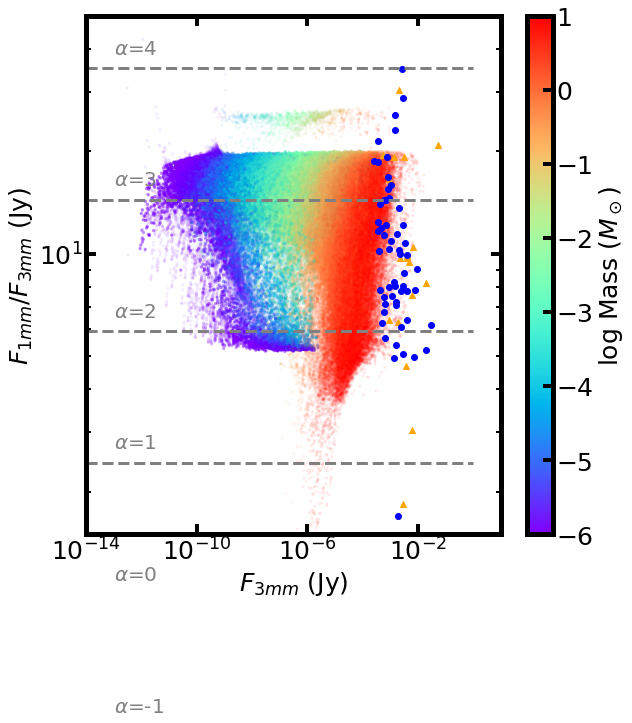

In [3]:
import glob
import os
import matplotlib as mpl
plt.rcParams['axes.labelsize']=25
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25
plt.rcParams['axes.titlesize']=25
mpl.rcParams['axes.linewidth'] = 5
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 4
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 4
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.minor.width'] = 2
params = {"xtick.top": True, "ytick.right": True, "xtick.direction": "in", "ytick.direction": "in"}
plt.rcParams.update(params)
b3freq = 92982346121.91989
b6freq = 226382496476.07114
    
apertures =np.logspace(2,6,20)
fig = plt.figure(figsize=(9,9))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
pathlist = glob.glob('/blue/adamginsburg/richardson.t/research/flux/r+24_models-1.2/s*')
geometry = [os.path.basename(path).split('/')[-1][:7] for path in pathlist]
seddir = '/orange/adamginsburg/w51/TaehwaYoo/SEDmodel_new/'

w51e_b3_flux_fits = Table.read(w51e_b3_flux)
w51e_b6_flux_fits = Table.read(w51e_b6_flux)
w51n_b3_flux_fits = Table.read(w51n_b3_flux)
w51n_b6_flux_fits = Table.read(w51n_b6_flux)
w51e_b6_flux_conv_fits = Table.read(w51e_b6_conv_flux)
w51n_b6_flux_conv_fits = Table.read(w51n_b6_conv_flux)

w51e_b3_major = w51e_b3_flux_fits['deconvolved_major'].value* np.pi/180 * 5.41*1000*206265
w51e_b6_major = w51e_b6_flux_fits['deconvolved_major'].value* np.pi/180 * 5.41*1000*206265
w51n_b3_major = w51n_b3_flux_fits['deconvolved_major'].value* np.pi/180 * 5.1*1000*206265
w51n_b6_major = w51n_b6_flux_fits['deconvolved_major'].value* np.pi/180 * 5.1*1000*206265
w51e_b3_minor = w51e_b3_flux_fits['deconvolved_minor'].value* np.pi/180 * 5.41*1000*206265
w51e_b6_minor = w51e_b6_flux_fits['deconvolved_minor'].value* np.pi/180 * 5.41*1000*206265
w51n_b3_minor = w51n_b3_flux_fits['deconvolved_minor'].value* np.pi/180 * 5.1*1000*206265
w51n_b6_minor = w51n_b6_flux_fits['deconvolved_minor'].value* np.pi/180 * 5.1*1000*206265



w51e_b3_int_flux = w51e_b3_flux_fits['flux']
w51e_b6_int_flux = w51e_b6_flux_conv_fits['flux']
w51n_b3_int_flux = w51n_b3_flux_fits['flux']
w51n_b6_int_flux = w51n_b6_flux_conv_fits['flux']

w51e_b3_int_fluxerr = w51e_b3_flux_fits['flux_upperr'] - w51e_b3_flux_fits['flux_lowerr']
w51e_b6_int_fluxerr = w51e_b6_flux_conv_fits['flux_upperr'] - w51e_b6_flux_conv_fits['flux_lowerr']
w51n_b3_int_fluxerr = w51n_b3_flux_fits['flux_upperr'] - w51n_b3_flux_fits['flux_lowerr']
w51n_b6_int_fluxerr = w51n_b6_flux_conv_fits['flux_upperr'] - w51n_b6_flux_conv_fits['flux_lowerr']


def flux_gaussian_multiple_apertures(flux, major, minor, rarr, rescale=True): # major, minor in FWHM, au unit
    if rescale:
        flux = flux*major/minor # making a 2d symmetric Gaussian with FWHM = FWHM_major
    
    major_sigma = major/np.sqrt(8*np.log(2))
    minor_sigma = minor/np.sqrt(8*np.log(2))
    peak_height = flux / 2 / np.pi/ major/ minor * 8 * np.log(2)
    if rescale:
        flux_rarr =2*np.pi*major_sigma**2 * peak_height * (1 - np.exp(-rarr**2/2/major_sigma**2))
    else:
        flux_rarr =2*np.pi*major_sigma*minor_sigma * peak_height * (1 - np.exp(-rarr**2/2/major_sigma/minor_sigma))

    return flux_rarr.astype('float')
cmap= plt.get_cmap('rainbow')
    
for path in geometry:
    
    filepath = seddir+path+'/flux_prop.fits'
    if not os.path.isfile(filepath):
        continue
    fluxfile = fits.open(filepath)
    cols = fluxfile[1].columns
    #if not 'mass_los' in cols.names:
   #     continue
    print(path)
    

    b6flux = fluxfile[1].data['b6 flux'][:,3]*1e-3*(1/5.41)**2
    b3flux = fluxfile[1].data['b3 flux'][:,3]*1e-3*(1/5.41)**2
    dusttemp = fluxfile[1].data['mass_los'][:,3]
    notemp = dusttemp>-99
    dusttemp = dusttemp[notemp]
    logtemp = np.log10(dusttemp)

    b3flux = b3flux[notemp] ; b6flux = b6flux[notemp]
    ss = ax1.scatter(b3flux, b6flux/b3flux,s=5,alpha=0.05, c=logtemp, cmap=cmap, vmin=-6, vmax=1)

    
w51e_flux_b3 = np.array([flux_gaussian_multiple_apertures(flux,major, minor, apertures[3],rescale=False) for flux, major, minor in zip(w51e_b3_int_flux, w51e_b3_major, w51e_b3_minor)])
w51e_flux_b6 = np.array([flux_gaussian_multiple_apertures(flux,major, minor, apertures[3],rescale=False) for flux, major, minor in zip(w51e_b6_int_flux, w51e_b6_major, w51e_b6_minor)])
w51eind = np.where((np.isfinite(w51e_flux_b3)&(np.isfinite(w51e_flux_b6))))
w51n_flux_b3 = np.array([flux_gaussian_multiple_apertures(flux,major, minor, apertures[3],rescale=False) for flux, major, minor in zip(w51n_b3_int_flux, w51n_b3_major, w51n_b3_minor)])
w51n_flux_b6 = np.array([flux_gaussian_multiple_apertures(flux,major, minor, apertures[3],rescale=False) for flux, major, minor in zip(w51n_b6_int_flux, w51n_b6_major, w51n_b6_minor)])
w51nind = np.where((np.isfinite(w51n_flux_b3)&(np.isfinite(w51n_flux_b6))))

print(w51n_flux_b3,w51n_flux_b3.dtype)

ax1.scatter(w51n_flux_b3[w51nind]*(5.41/5.1)**2, w51n_flux_b6[w51nind]/w51n_flux_b3[w51nind], marker='^', c='orange',label='W51-IRS2')
ax1.scatter(w51e_flux_b3[w51eind], w51e_flux_b6[w51eind]/w51e_flux_b3[w51eind], marker='o',c='b',label='W51-E')
color_bar = plt.colorbar(ss, ax=ax1,alpha=1)

alphaarr =[-1,0,1,2,3,4]
for alpha in alphaarr:
    b6b3ratio = 10**(alpha*np.log10(b6freq/b3freq))
    ax1.plot([1e-14,1],[b6b3ratio, b6b3ratio], ls='dashed', c='gray',lw=3)
    ax1.text(1e-13,b6b3ratio*1.1,r'$\alpha$=%d'%alpha, c='gray',fontsize=20)


color_bar.set_alpha(1)
color_bar.draw_all()
color_bar.set_label('log Mass ($M_\odot$)')
ax1.set_xlim(1e-14,1e1)
ax1.set_ylim(1.5,50)
ax1.set_xlabel('$F_{3mm}$ (Jy)')
ax1.set_ylabel('$F_{1mm}/F_{3mm}$ (Jy)')
ax1.set_xscale('log')
ax1.set_yscale('log')
plt.show()
#plt.savefig('mass_los_plot_obs.png')



s-pbsmi
s-p-hmi
spu-hmi
spubsmi
s-pbhmi
s-u-smi
s-ubhmi
spu-smi
s-u-hmi
s-ubsmi
sp--hmi
sp--s-i
spubhmi
sp--smi
s-p-smi
sp--h-i


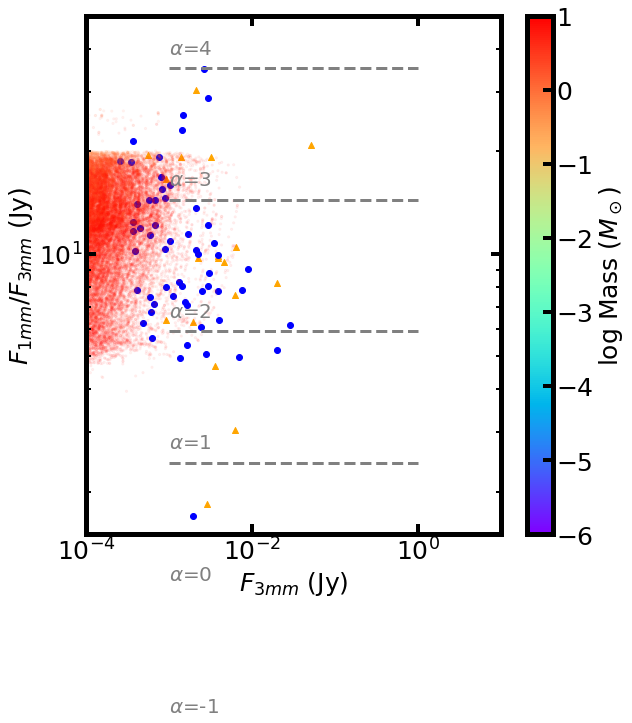

In [6]:
fig = plt.figure(figsize=(9,9))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.scatter(w51n_flux_b3[w51nind]*(5.41/5.1)**2, w51n_flux_b6[w51nind]/w51n_flux_b3[w51nind], marker='^', c='orange',label='W51-IRS2')
ax1.scatter(w51e_flux_b3[w51eind], w51e_flux_b6[w51eind]/w51e_flux_b3[w51eind], marker='o',c='b',label='W51-E')
color_bar = plt.colorbar(ss, ax=ax1,alpha=1)

alphaarr =[-1,0,1,2,3,4]
for alpha in alphaarr:
    b6b3ratio = 10**(alpha*np.log10(b6freq/b3freq))
    ax1.plot([1e-3,1],[b6b3ratio, b6b3ratio], ls='dashed', c='gray',lw=3)
    ax1.text(1e-3,b6b3ratio*1.1,r'$\alpha$=%d'%alpha, c='gray',fontsize=20)
for path in geometry:
    
    filepath = seddir+path+'/flux_prop.fits'
    if not os.path.isfile(filepath):
        continue
    fluxfile = fits.open(filepath)
    cols = fluxfile[1].columns
    #if not 'mass_los' in cols.names:
   #     continue
    print(path)
    

    b6flux = fluxfile[1].data['b6 flux'][:,3]*1e-3*(1/5.41)**2
    b3flux = fluxfile[1].data['b3 flux'][:,3]*1e-3*(1/5.41)**2
    dusttemp = fluxfile[1].data['mass_los'][:,3]
    notemp = dusttemp>-99
    dusttemp = dusttemp[notemp]
    logtemp = np.log10(dusttemp)

    b3flux = b3flux[notemp] ; b6flux = b6flux[notemp]
    ss = ax1.scatter(b3flux, b6flux/b3flux,s=5,alpha=0.05, c=logtemp, cmap=cmap, vmin=-6, vmax=1)


color_bar.set_alpha(1)
color_bar.draw_all()
color_bar.set_label('log Mass ($M_\odot$)')
ax1.set_xlim(1e-4,1e1)
ax1.set_ylim(1.5,50)
ax1.set_xlabel('$F_{3mm}$ (Jy)')
ax1.set_ylabel('$F_{1mm}/F_{3mm}$ (Jy)')
ax1.set_xscale('log')
ax1.set_yscale('log')
plt.show()